In [278]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
from iso3166 import countries_by_name
from shapely.ops import cascaded_union
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline  

### Data Frame

In [10]:
iso = boundaries.drop(columns='geometry')

In [11]:
iso['iso']= ['IND','KEN','UGA','BGD','NGA','TZA']

In [12]:
iso

,country,iso
0,India,IND
0,Kenya,KEN
0,Uganda,UGA
0,Bangladesh,BGD
0,Nigeria,NGA
0,Tanzania,TZA


In [104]:
countries = pd.DataFrame(countries_by_name)
countries = pd.DataFrame({'country':countries.iloc[0], 'iso3': countries.iloc[2]})
add_countries = pd.DataFrame({'country':['Republic of Congo', 'Syria', 'Ivory Coast', 'Tanzania', 'Democratic Republic of the Congo'],
                            'iso3': ['COG','SYR','CIV', 'TZA', 'COD']})
countries = pd.concat([countries, add_countries])
countries.head()

,country,iso3
AFGHANISTAN,Afghanistan,AFG
ALBANIA,Albania,ALB
ALGERIA,Algeria,DZA
AMERICAN SAMOA,American Samoa,ASM
ANDORRA,Andorra,AND


***

# AidData

** Democratic Republic of the Congo **

In [205]:
DRC_locations = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/DRC-AIMS_GeocodedResearchRelease_Level1_v1.3.1/data/locations.csv')
DRC_projects = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/DRC-AIMS_GeocodedResearchRelease_Level1_v1.3.1/data/projects.csv')
DRC_transactions = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/DRC-AIMS_GeocodedResearchRelease_Level1_v1.3.1/data/transactions.csv')

In [206]:
DRC_locations = DRC_locations[['project_id', 'latitude', 'longitude', 'gazetteer_adm_name']]
DRC_projects = DRC_projects[['project_id','project_title','donors', 'donors_iso3', 'recipients', 'recipients_iso3','ad_sector_names', 'status', 'transactions_start_year', 'transactions_end_year', 'total_commitments']]
DRC_transactions = DRC_transactions[['project_id','transaction_year', 'transaction_currency', 'transaction_value']]

In [207]:
DRC_transactions = pd.merge(DRC_transactions, DRC_projects, how='left', on='project_id')
DRC_transactions = pd.merge(DRC_transactions, DRC_locations, how='left', on='project_id')
DRC_transactions.dropna(inplace=True)

** Nigeria **

In [218]:
Nigeria_locations = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/NigeriaAIMS_GeocodedResearchRelease_Level1_v1.3.1/data/locations.csv')
Nigeria_projects = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/NigeriaAIMS_GeocodedResearchRelease_Level1_v1.3.1/data/projects.csv')
Nigeria_transactions = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/NigeriaAIMS_GeocodedResearchRelease_Level1_v1.3.1/data/transactions.csv')

In [219]:
Nigeria_locations = Nigeria_locations[['project_id', 'latitude', 'longitude', 'gazetteer_adm_name']]
Nigeria_projects = Nigeria_projects[['project_id','project_title','donors', 'donors_iso3', 'recipients', 'recipients_iso3','ad_sector_names', 'status', 'transactions_start_year', 'transactions_end_year', 'total_commitments']]
Nigeria_transactions = Nigeria_transactions[['project_id','transaction_year', 'transaction_currency', 'transaction_value']]

In [220]:
Nigeria_transactions = pd.merge(Nigeria_transactions, Nigeria_projects, how='left', on='project_id')
Nigeria_transactions = pd.merge(Nigeria_transactions, Nigeria_locations, how='left', on='project_id')
Nigeria_transactions.dropna(inplace=True)

** Senegal **

In [222]:
Senegal_locations = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SenegalAIMS_geocodedresearchrelease_level1_v1.5.1/data/locations.csv')
Senegal_projects = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SenegalAIMS_geocodedresearchrelease_level1_v1.5.1/data/projects.csv')
Senegal_transactions = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SenegalAIMS_geocodedresearchrelease_level1_v1.5.1/data/transactions.csv')

In [223]:
Senegal_locations = Senegal_locations[['project_id', 'latitude', 'longitude', 'gazetteer_adm_name']]
Senegal_projects = Senegal_projects[['project_id','project_title','donors', 'donors_iso3', 'recipients', 'recipients_iso3','ad_sector_names', 'status', 'transactions_start_year', 'transactions_end_year', 'total_commitments']]
Senegal_transactions = Senegal_transactions[['project_id','transaction_year', 'transaction_currency', 'transaction_value']]

In [224]:
Senegal_transactions = pd.merge(Senegal_transactions, Senegal_projects, how='left', on='project_id')
Senegal_transactions = pd.merge(Senegal_transactions, Senegal_locations, how='left', on='project_id')
Senegal_transactions.dropna(inplace=True)

** Sierra Leone **

In [226]:
SierraLeone_locations = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SierraLeoneAIMS_geocodedresearchrelease_level1_v1.0.0/data/locations.csv')
SierraLeone_projects = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SierraLeoneAIMS_geocodedresearchrelease_level1_v1.0.0/data/projects.csv')
SierraLeone_transactions = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SierraLeoneAIMS_geocodedresearchrelease_level1_v1.0.0/data/transactions.csv')

In [227]:
SierraLeone_locations = SierraLeone_locations[['project_id', 'latitude', 'longitude', 'gazetteer_adm_name']]
SierraLeone_projects = SierraLeone_projects[['project_id','project_title','donors', 'donors_iso3', 'recipients', 'recipients_iso3','ad_sector_names', 'status', 'transactions_start_year', 'transactions_end_year', 'total_commitments']]
SierraLeone_transactions = SierraLeone_transactions[['project_id','transaction_year', 'transaction_currency', 'transaction_value']]

In [228]:
SierraLeone_transactions = pd.merge(SierraLeone_transactions, SierraLeone_projects, how='left', on='project_id')
SierraLeone_transactions = pd.merge(SierraLeone_transactions, SierraLeone_locations, how='left', on='project_id')
SierraLeone_transactions.dropna(inplace=True)

** Somalia ** 

In [230]:
Somalia_locations = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SomaliaAIMS_GeocodedResearchRelease_Level1_v1.1.1/data/locations.csv')
Somalia_projects = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SomaliaAIMS_GeocodedResearchRelease_Level1_v1.1.1/data/projects.csv')
Somalia_transactions = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/SomaliaAIMS_GeocodedResearchRelease_Level1_v1.1.1/data/transactions.csv')

In [231]:
Somalia_locations = Somalia_locations[['project_id', 'latitude', 'longitude', 'gazetteer_adm_name']]
Somalia_projects = Somalia_projects[['project_id','project_title','donors', 'donors_iso3', 'recipients', 'recipients_iso3','ad_sector_names', 'status', 'transactions_start_year', 'transactions_end_year', 'total_commitments']]
Somalia_transactions = Somalia_transactions[['project_id','transaction_year', 'transaction_currency', 'transaction_value']]

In [232]:
Somalia_transactions = pd.merge(Somalia_transactions, Somalia_projects, how='left', on='project_id')
Somalia_transactions = pd.merge(Somalia_transactions, Somalia_locations, how='left', on='project_id')
Somalia_transactions.dropna(inplace=True)

** Uganda **

In [234]:
Uganda_locations = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/UgandaAIMS_GeocodedResearchRelease_Level1_v1.4.1/data/locations.csv')
Uganda_projects = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/UgandaAIMS_GeocodedResearchRelease_Level1_v1.4.1/data/projects.csv')
Uganda_transactions = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/AidData/UgandaAIMS_GeocodedResearchRelease_Level1_v1.4.1/data/transactions.csv')

In [235]:
Uganda_locations = Uganda_locations[['project_id', 'latitude', 'longitude', 'gazetteer_adm_name']]
Uganda_projects = Uganda_projects[['project_id','project_title','donors', 'donors_iso3', 'recipients', 'recipients_iso3','ad_sector_names', 'status', 'transactions_start_year', 'transactions_end_year', 'total_commitments']]
Uganda_transactions = Uganda_transactions[['project_id','transaction_year', 'transaction_currency', 'transaction_value']]

In [236]:
Uganda_transactions = pd.merge(Uganda_transactions, Uganda_projects, how='left', on='project_id')
Uganda_transactions = pd.merge(Uganda_transactions, Uganda_locations, how='left', on='project_id')
Uganda_transactions.dropna(inplace=True)

** Final table **

In [240]:
AidData_transactions = pd.concat([DRC_transactions,Nigeria_transactions,Senegal_transactions,
                                 SierraLeone_transactions,Somalia_transactions,Uganda_transactions])

In [242]:
AidData_transactions.head()

,project_id,transaction_year,transaction_currency,transaction_value,project_title,donors,donors_iso3,recipients,recipients_iso3,ad_sector_names,status,transactions_start_year,transactions_end_year,total_commitments,latitude,longitude,gazetteer_adm_name
135,1120098715286,2012,USD,851494.144731,Renforcer la pacification des communautés loca...,USAID,USA,DRC,COD,Government and civil society,Implementation,2012,2012,851494.144731,-0.66667,28.75000,Earth|Africa|DR Congo|Nord Kivu
136,1120098715286,2012,USD,851494.144731,Renforcer la pacification des communautés loca...,USAID,USA,DRC,COD,Government and civil society,Implementation,2012,2012,851494.144731,2.50000,27.00000,Earth|Africa|Congo|Eastern Province
137,1120098715286,2012,USD,851494.144731,Renforcer la pacification des communautés loca...,USAID,USA,DRC,COD,Government and civil society,Implementation,2012,2012,851494.144731,-3.16667,28.25000,Earth|Africa|DR Congo|South Kivu
138,1120098715286,2012,USD,851494.144731,Renforcer la pacification des communautés loca...,USAID,USA,DRC,COD,Government and civil society,Implementation,2012,2012,851494.144731,1.56667,30.25000,Earth|Africa|DR Congo|Eastern Province|Ituri
139,1120098715286,2012,USD,851494.144731,Renforcer la pacification des communautés loca...,USAID,USA,DRC,COD,Government and civil society,Implementation,2012,2012,851494.144731,-0.65515,29.03398,Earth|Africa|DR Congo|Nord Kivu|North Kivu


Boundaries

In [270]:
countries = gpd.read_file('/Users/ikersanchez/Vizzuality/DATA/all_countries/all_countries.shp')
# COD border
border_mask = countries['iso_a3'] == 'COD'
COD_border = countries[border_mask]
# NGA border
border_mask = countries['iso_a3'] == 'NGA'
NGA_border = countries[border_mask]
# SEN border
border_mask = countries['iso_a3'] == 'SEN'
SEN_border = countries[border_mask]
# SLE border
border_mask = countries['iso_a3'] == 'SLE'
SLE_border = countries[border_mask]
# SOM border
border_mask = countries['iso_a3'] == 'SOM'
SOM_border = countries[border_mask]
# UGA border
border_mask = countries['iso_a3'] == 'UGA'
UGA_border = countries[border_mask]
# All
borders = pd.concat([COD_border,NGA_border,SEN_border,SLE_border,SOM_border,UGA_border])

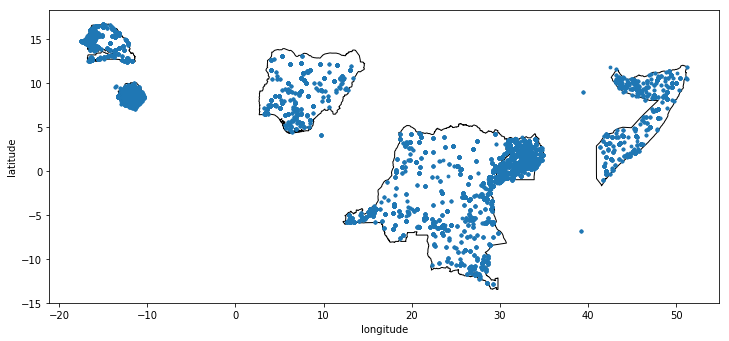

In [302]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

borders.plot(ax=ax, color='white', edgecolor='black')
AidData_transactions.plot(ax=ax, x='longitude', y='latitude', kind='scatter', s=8)

Remove the points outside the countries

In [293]:
points = []
for i in range(len(AidData_transactions)):
    x = AidData_transactions['longitude'].iloc[i]
    y = AidData_transactions['latitude'].iloc[i]
    points.append(Point(x,y))
AidData_transactions['geometry'] = points

In [301]:
# Coordinate reference system : WGS84
AidData_transactions.crs  = {'init': 'epsg:4326'}

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [303]:
# Remove points outside countries
AidData_transactions = gpd.sjoin(AidData_transactions, borders, how='inner', op='intersects')

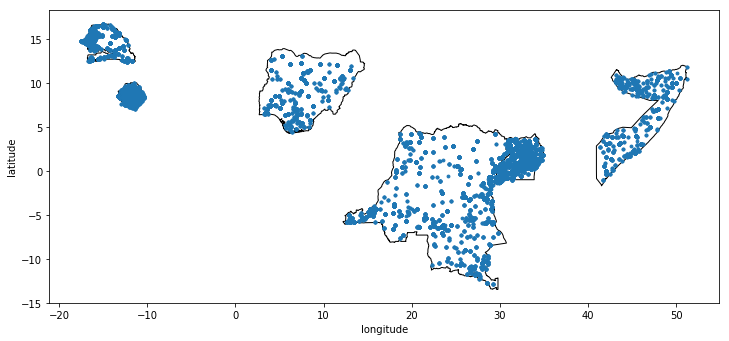

In [304]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

borders.plot(ax=ax, color='white', edgecolor='black')
AidData_transactions.plot(ax=ax, x='longitude', y='latitude', kind='scatter', s=8)

In [306]:
# Save table
AidData_transactions.to_csv('./data/cartodb/AidData_transactions.csv')

*** 

# HumanDataExchange

** KENYA,
NIGERIA,
TANZANIA,
UGANDA **

## Africa

### Electrical Grid

In [107]:
africa_grid = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/HumanDataExchange/Africa/Electrical Grid/africagrid20170504/africa_grid_20170906final.shp')

In [108]:
africa_grid.head()

,status,country,source,operator,from,to,voltage_kV,length_km,geometry
0,Existing,Togo,ECREEE,,,,161.0,61,LINESTRING (1.553379305669302 6.50435584264217...
1,Planned,Togo,ECREEE,,,,161.0,47,LINESTRING (1.613464000384093 6.90183817510557...
2,Existing,Togo,ECREEE,,,,63.0,5,LINESTRING (1.138249186828813 9.03337568229448...
3,Planned,Togo,ECREEE,,,,330.0,138,LINESTRING (-0.015000162519244 9.4571597856660...
4,Planned,Togo,ECREEE,,,,330.0,154,LINESTRING (1.223259849471283 9.52457135793874...


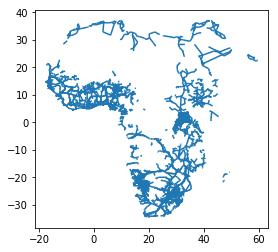

In [109]:
africa_grid.plot()

** Uganda **

In [307]:
uganda_grid = africa_grid[africa_grid['country'] == 'Uganda']
# UGA boundary
border_mask = countries['iso_a3'] == 'UGA'
uganda_boundary = countries[border_mask]

In [35]:
# Coordinate reference system : WGS84
uganda_grid.crs  = {'init': 'epsg:4326'}
uganda_boundary.crs  = {'init': 'epsg:4326'}

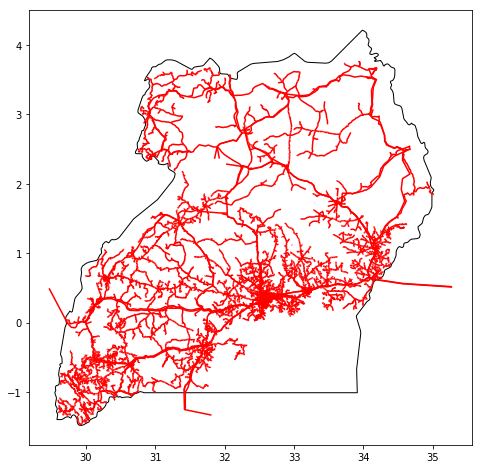

In [308]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_aspect('equal')

uganda_boundary.plot(ax=ax, color='white', edgecolor='black')
uganda_grid.plot(ax=ax, color='r')

** Final table **

In [110]:
# Drop columns
africa_grid.drop(columns=['from','to'], inplace=True)

In [111]:
# Add year
africa_grid['year'] = '2017'

In [112]:
# Add iso
africa_grid = pd.merge(africa_grid, countries, how='left', on='country')
africa_grid['iso'] = africa_grid['iso3']
africa_grid.drop(columns='iso3', inplace=True)

In [121]:
# Reorder columns
africa_grid = africa_grid[['status','source','operator','voltage_kV','length_km','iso','country','year','geometry']]

In [122]:
africa_grid.head()

,status,source,operator,voltage_kV,length_km,iso,country,year,geometry
0,Existing,ECREEE,,161.0,61,TGO,Togo,2017,LINESTRING (1.553379305669302 6.50435584264217...
1,Planned,ECREEE,,161.0,47,TGO,Togo,2017,LINESTRING (1.613464000384093 6.90183817510557...
2,Existing,ECREEE,,63.0,5,TGO,Togo,2017,LINESTRING (1.138249186828813 9.03337568229448...
3,Planned,ECREEE,,330.0,138,TGO,Togo,2017,LINESTRING (-0.015000162519244 9.4571597856660...
4,Planned,ECREEE,,330.0,154,TGO,Togo,2017,LINESTRING (1.223259849471283 9.52457135793874...


In [123]:
# Save table
africa_grid.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/cartodb/electrical_grid.csv')

***

# Mobile Coverage

** INDIA,
BANGLADESH,
KENYA,
NIGERIA,
TANZANIA,
UGANDA **

Mobile Coverage Explorer is a representation of areas covered by mobile networks around the world. It is supplied as polygon data which has been created from submissions made directly to Collins Bartholomew or the GSMA from network operators who provide roaming detail for inclusion in the GSMA’s Roaming and Coverage Maps web application.

The coverage data is supplied as three separate files:

- Global_GSM_<date> which is a representation of the GSM (2G) network submitted by operators. 
- Global_3G_<date> which is a representation of the 3G network submitted by operators. 
- Global_4G_<date> which is a representation of the 4G network submitted by operators.

### Global 3G

In [337]:
global_3d = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/Mobile Coverage Explorer WGS84 v201712 - ESRI SHAPE/ReducedData/Global_3G_201712/Global_3G_201712.shp')

In [338]:
# GROP COLUMN
global_3d.drop(columns='FID', inplace=True)

In [339]:
# Add year
global_3d['year'] = '2017'

In [340]:
global_3d.head()

,geometry,year
0,(POLYGON ((93.00680792500003 60.00000000000006...,2017


In [341]:
global_3d.crs

{'init': 'epsg:4326'}

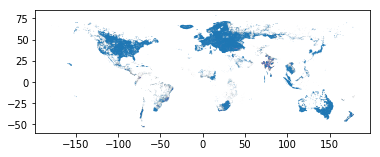

In [342]:
global_3d.plot()

In [343]:
# Save table
global_3d.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/cartodb/mobile_coverage_global_3d.csv')

### Global 4G

In [329]:
global_4d = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/Mobile Coverage Explorer WGS84 v201712 - ESRI SHAPE/ReducedData/Global_4G_201712/Global_4G_201712.shp')

In [330]:
# GROP COLUMN
global_4d.drop(columns='FID', inplace=True)

In [331]:
# Add year
global_4d['year'] = '2017'

In [332]:
global_4d.head()

,geometry,year
0,(POLYGON ((-67.79711166799996 -10.057029417999...,2017


In [333]:
global_4d.crs

{'init': 'epsg:4326'}

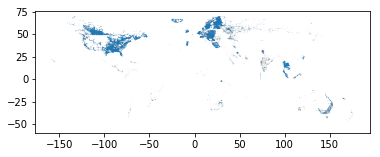

In [334]:
global_4d.plot()

In [336]:
# Save table
global_4d.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/cartodb/mobile_coverage_global_4d.csv')

***

# Urban Areas

** INDIA,
BANGLADESH,
KENYA,
NIGERIA,
TANZANIA,
UGANDA **

In [143]:
urban = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/Contextual_Layers/ne_10m_urban_areas/ne_10m_urban_areas.shp')

In [144]:
urban.head()

,scalerank,featurecla,area_sqkm,min_zoom,geometry
0,9,Urban area,12.581,7.7,POLYGON ((-1.657181596397606 37.38897532793764...
1,5,Urban area,111.989,5.0,"POLYGON ((-2.446053332937907 36.9779110517198,..."
2,8,Urban area,46.348,7.6,POLYGON ((-3.146292735553118 36.78131072137965...
3,8,Urban area,46.058,7.6,"POLYGON ((-3.472369677012011 36.7439159632052,..."
4,7,Urban area,84.596,7.0,POLYGON ((-4.815971538667867 36.50885722612246...


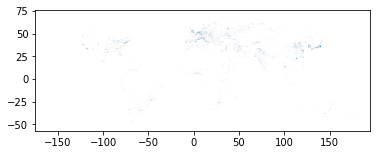

In [145]:
urban.plot()

In [133]:
urban.crs

{'init': 'epsg:4326'}

** Final table **

In [146]:
# Drop columns
urban.drop(columns=['featurecla','scalerank','min_zoom'], inplace=True)

In [147]:
# Add year
urban['year'] = '2003'

In [149]:
# Reorder columns
urban = urban[['area_sqkm','year','geometry']]

In [150]:
urban.head()

,area_sqkm,year,geometry
0,12.581,2003,POLYGON ((-1.657181596397606 37.38897532793764...
1,111.989,2003,"POLYGON ((-2.446053332937907 36.9779110517198,..."
2,46.348,2003,POLYGON ((-3.146292735553118 36.78131072137965...
3,46.058,2003,"POLYGON ((-3.472369677012011 36.7439159632052,..."
4,84.596,2003,POLYGON ((-4.815971538667867 36.50885722612246...


In [151]:
# Save table
urban.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/cartodb/urban_areas.csv')

***

# Resource Watch

### Global raster

** [Accessibility to Cities](https://resourcewatch.org/data/explore/cit01701-Travel-Time-to-Major-Cities) ** 

** [Population (Grid, 1 km)](https://resourcewatch.org/data/explore/soc_031-Gridded-Population) ** 

** [Urban Built-Up Area](https://resourcewatch.org/data/explore/Cit014-Built-Up-Grid) **

** [Agricultural Exposure to Water Stress](https://resourcewatch.org/data/explore/wat033-Agriculture-Water-Demand-and-Depletion) **

** [Erosion Risk](https://resourcewatch.org/data/explore/wat015-Erosion-Risk) ** 

** [Annual Precipitation](https://resourcewatch.org/data/explore/wat034-Annual-Precipitation) **

** [Aridity](https://resourcewatch.org/data/explore/cli030-Land-Aridity) ** 

### Global vector

** [Roads](https://resourcewatch.org/data/explore/cit016-Road-Network) **

** [Roadless Areas](https://resourcewatch.org/data/explore/Global-Roadless-Areas) ** 

** [Current Water Risk](https://resourcewatch.org/data/explore/wat001-Baseline-Water-Stress) ** 

** [Reservoirs and Dams](https://resourcewatch.org/data/explore/Global-Reservoir-and-Dam-GRanD) ** 

### Country contextual information

** [Access to Electricity](https://resourcewatch.org/data/explore/ene012-Access-to-Electricity) ** 

** [Adult Literacy Rate](https://resourcewatch.org/data/explore/Adult-Literacy-Rate) ** 

** [Child Malnutrition](https://resourcewatch.org/data/explore/Child-Malnutrition) ** 

** [Current Account Balance](https://resourcewatch.org/data/explore/Current-Account-Balance-BoP-Current-USdollar) ** 

** [Flood Risk](https://resourcewatch.org/data/explore/wat007-flood-risk) ** 

** [Gender Development Index](https://resourcewatch.org/data/explore/Gender-Development-Index) ** 

** [Gender Inequality Index](https://resourcewatch.org/data/explore/soc025-Gender-Inequality-Index) ** 

** [Gross Domestic Product](https://resourcewatch.org/data/explore/Gross-Domestic-Product) ** 

** [Regulatory Restrictiveness Index](https://resourcewatch.org/data/explore/Regulatory-Restrictiveness-Index) ** 

** [Urban Population](https://resourcewatch.org/data/explore/Urban-Population) ** 

** [Urban Population Living in Slums](https://resourcewatch.org/data/explore/Percent-of-Urban-Population-living-in-Slums) ** 

** [Vulnerability to Climate Change Index](https://resourcewatch.org/data/explore/Vulnerability-to-Climate-Change-Index) ** 